In [1]:
# Ne pas oublier d'exécuter cette ligne au début de chaque séance pour charger les bibliothèques nécessaires
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<H1>L1 CUPGE - Python TP4</H1>

# 1 Tableaux

## 1.1 Le type `array`

Le type `array` permet de manipuler des tableaux de nombres. Il est similaire au type `list` qu'on a déjà utilisé. Les différences principales sont les suivantes:

-   tous les éléments du tableau doivent être de même type;
-   les opérateurs `+`, `-`, etc. ainsi que la plupart des fonctions numériques effectuent des opérations terme à terme;
-   il est compliqué d'ajouter ou enlever des éléments à un tableau (contrairement à une liste). En général, on crée d'abord un tableau de la taille désirée qu'on remplit ensuite avec les valeurs souhaitées.

On peut créer un tableau à partir d'une liste en la convertissant grâce à la fonction `array`. Le deuxième argument est optionnel, il définit le type des éléments du tableau.

Voici quelques exemples d'utilisation élémentaire.

In [2]:
T0 = array([0, 1, 2, 3, 4, 5])
print("T0 =", T0)
print("T0 est de type :", type(T0))

T1 = array([2, -1, 7, 9, 3, 11], float)
print("T1 =", T1)

print("T1 * T0 =", T1 * T0)   #Opérations élément par élément
print("T1 + T0 =", T1 + T0)
print("3 * cos(T1 * pi) =", 3 * cos(T1 * pi))

T0 = [0 1 2 3 4 5]
T0 est de type : <class 'numpy.ndarray'>
T1 = [ 2. -1.  7.  9.  3. 11.]
T1 * T0 = [ 0. -1. 14. 27. 12. 55.]
T1 + T0 = [ 2.  0.  9. 12.  7. 16.]
3 * cos(T1 * pi) = [ 3. -3. -3. -3. -3. -3.]


In [3]:
#Parcours des éléments
for k in range(len(T1)):
    print(T1[k])

2.0
-1.0
7.0
9.0
3.0
11.0


## 1.2 Les tableaux bidimensionnels

Les tableaux peuvent aussi avoir plusieurs dimensions. Par exemple, dans ce qui suit, on va manipuler des tableaux bidimensionnels (créés à partir de listes de listes de nombres).

Dans ce cas, on notera que la convention consiste à indexer:

-   d'abord le numéro de la ligne (en partant du haut, zéro pour la première ligne);
-   puis le numéro de la colonne (en partant de la gauche, zéro pour la première colonne).

Voici quelques exemples.

In [4]:
T2 = array([[1, 2, 3, 4], 
            [5, 6, 7, 8],
            [9, 10, 11, 12],
            [13, 14, 15, 16]])
print(T2)
print(T2[1, 2])    # affichage de l'élément sur la 2ème ligne et la 3ème colonne
T2[3, 1] = 0       # modification de l'élément sur la 4ème ligne et 2ème colonne
print(T2)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
7
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13  0 15 16]]


In [5]:
#Affichage des éléments sur la diagonale descendante
for k in range(4):
    print(T2[k, k])

1
6
11
16


**Exercice**: sur le modèle de la boucle précédente, afficher les éléments de `T2` situés sur la diagonale montante.

In [16]:
for k in range(4):
    print(T2[3-k, k])

13
10
7
4


On dispose de plusieurs fonctions pour créer des tableaux à deux dimensions:

-   `zeros([hauteur, largeur])` pour créer un tableau de `float` rempli de zéros;
-   `ones([hauteur, largeur])` pour créer un tableau rempli de uns;
-   `rand(hauteur, largeur)` pour créer un tableau rempli de valeurs aléatoires comprises entre 0 et 1. Cette dernière fonction ne prend pas de crochets pour spécifier la taille du tableau.


In [17]:
print(zeros([2, 3]))
print(ones([3, 2]))
print(rand(3, 3))

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[0.25703923 0.65611896 0.5856552 ]
 [0.2668006  0.62255999 0.70871256]
 [0.94861    0.5704693  0.17527981]]


**Exercice**: générer un tableau de taille $10\times10$ qui contient la table de multiplication des entiers compris entre 1 et 10.

# 2 Géométrie

## 2.1 Géométrie dans le plan

Dans ce qui suit, on se place dans le plan $\mathbb R^2$. Dans Python, on représentera des points ou des vecteurs du plan par des tableaux contenant deux nombres qui représentent leurs coordonnées dans la base canonique.

Python fournit quelques fonctions utiles pour manipuler de tels objets:

-   `norm(u)` renvoie la norme d'un vecteur;
-   `dot(u, v)` renvoie le produit scalaire des vecteurs $\vec u$ et $\vec v$.

Écrire une fonction `normalize(u)` qui renvoie un vecteur **unitaire** de même direction et même sens que $\vec u$.

Dans la cellule qui suit, on donne la fonction `display_vect` qui permet d'afficher des vecteurs à l'écran. Les paramètres `name`, `origin` et `color` sont optionnels.

In [ ]:
def display_vect(vect, name = "", origin = zeros([2]), color = "k"):
    plot(origin[0], origin[1], marker = "o", color = color)
    plot(origin[0] - 0.2 * vect[0], origin[1] - 0.2 * vect[1], marker = None)
    plot(origin[0] + 1.2 * vect[0], origin[1] + 1.2 * vect[1], marker = None)
    v = vect / norm(vect)
    r = 0.2 * sqrt(norm(vect))
    arrow(origin[0], origin[1], vect[0] - r * v[0], vect[1] - r * v[1], 
          head_width = 0.5 * r, head_length = r,
          fc = color, ec = color)
    o = angle(- vect[1] + 1j * vect[0]) % pi
    v = 0 * array([cos(o), sin(o)])
    if o > 0.6 * pi:
        ha = "right"
    elif o < 0.4 * pi:
        ha = "left"
    else:
        ha = "center"
    if name == "":
        t = ""
    else:
        t = "$\overrightarrow{" + name + "}$"
    text(origin[0] + 0.5 * vect[0] + v[0], origin[1] + 0.5 * vect[1] + v[1], t, 
         color = color, ha = ha, va = "bottom", rotation = o * 180 / pi - 90, size = 15)
    axis("scaled")
    grid(True)
    xticks(arange(trunc(xlim()[0]), ceil(xlim()[1]), 1))
    yticks(arange(trunc(ylim()[0]), ceil(ylim()[1]), 1))

u = array([1, 2])
v = array([2, -2])
display_vect(u, name = "u", color = "red")
display_vect(v, origin = u, name = "v", color = "green")
display_vect(u + v, name = "u+v", color = "blue")

Soient $\vec u$ et $\vec v$ deux vecteurs avec $\vec v$ non nul. Écrire une fonction `project(u, v)` qui renvoie la projection orthogonale du vecteur $\vec u$ sur la droite de vecteur directeur $\vec v$. L'utiliser pour calculer la projection du vecteur $(-1,3)$ sur le vecteur $(4,-1)$ et afficher le dessin des trois vecteurs.

**Indication**: il peut être utile de faire un dessin. Notons $p(\vec u)$ la projection de $\vec u$. Puisque $\vec v$ et $p(\vec u)$ sont colinéaires, il existe donc $\lambda\in\mathbb R$ tel que

$$p(\vec u)=\lambda\vec v.$$

Par ailleurs, on sait aussi que

$$\vec u\cdot\vec v=p(\vec u)\cdot\vec v.$$

En combinant ces deux égalités, on peut en déduire aisément la valeur de $\lambda$, et donc celle de $p(\vec u)$...

In [ ]:
def project(u, v):
    # Code à compléter...

u = array([-1, 3])
v = array([4, -1])
w = project(u, v)
print(w)

display_vect(u, name = "u", color = "red")
display_vect(v, name = "v", color = "green")
display_vect(w, name = "p(u)", color = "blue")

Écrire une fonction `reflect(u, v)` qui renvoie le symétrique du vecteur $\vec u$ par rapport à la droite de vecteur directeur $\vec v$. La tester avec les vecteurs $\vec u$ et $\vec v$ de la question précédente.

**Indication**: là encore, il peut être utile de faire un dessin. Si on note $r(\vec u)$ le symétrique de $\vec u$, alors on a

$$\frac{\vec u+r(\vec u)}2=p(\vec u).$$

On en déduit aisément l'expression de $r(\vec u)$ en fonction de $\vec u$ et $p(\vec u)$.

In [ ]:
def reflect(u, v):
    # Code à compléter...

u = array([-1, 3])
v = array([4, -1])
w = reflect(u, v)
print(w)

display_vect(u, name = "u", color = "red")
display_vect(v, name = "v", color = "green")
display_vect(project(u, v), name = "p(u)", color = "blue")
display_vect(w, name = "r(u)", color = "black")

Dans ce qui suit, on représente une droite affine $\mathcal D$ par:

-   un point $P$ qui lui appartient;
-   un vecteur directeur $\vec u$.

Ainsi, $\mathcal D$ est l'ensemble des point $M$ tels que:
$$\overrightarrow{OM}=\overrightarrow{OP}+k\vec u,\qquad k\in\mathbb R.$$

On fournit une fonction `display_line(P, u)` pour afficher une telle droite.

In [ ]:
def display_line(P, u):
    v = u / norm(u)
    arrow(P[0] - 100 * v[0], P[1] - 100 * v[1], 200 * v[0], 200 * v[1], ec = "red")
    plot(P[0], P[1], "o")
    display_vect(u, origin = P)
    
P = array([0, 3])
u = array([-1, 2])
Q = array([5, -1])
v = array([-2, 1])

display_line(P, u)
display_line(Q, v)

Définir une fonction `line_intersect(P, u, Q, v)` qui renvoie le point d'intersection des deux droites définies respectivement par les points $P$ et $Q$ et les vecteurs directeurs $\vec u$ et $\vec v$. On supposera que les droites ne sont pas parallèles et on pourra tester avec:
$$P = (0, 3)\qquad\vec u = (-1, 2)\qquad Q = (5, -1)\qquad\vec v = (-2, 1).$$

In [ ]:
def line_intersect(P, u, Q, v):
    # Code à compléter...

P = array([0, 3])
u = array([-1, 2])
Q = array([5, -1])
v = array([-2, 1])

print(line_intersect(P, u, Q, v))

On représente un cercle $\mathcal C$ par:

-   son centre $C$;
-   son rayon $r$.

Ainsi $\mathcal C$ est l'ensemble des points $M$ tels que:
$$\Vert\overrightarrow{CM}\Vert=r.$$

On fournit une fonction `display_circle(C, r)` pour afficher un tel cercle.

In [ ]:
def display_circle(C, r, color = "black"):
    t = linspace(0, 2 * pi, 200)
    plot(C[0], C[1], "o", color = color)
    plot(C[0] + r * cos(t), C[1] + r * sin(t), color = color)
    plot(C[0] - r - 0.3, C[1] - r - 0.3, marker = None)
    plot(C[0] + r + 0.3, C[1] + r + 0.3, marker = None)
    axis("equal")
    grid(True)

C = array([1, -1.5])
r = sqrt(5)

display_circle(C, r)

Définir une fonction `circle_intersect(P, u, C, r)` qui renvoie la liste des points d'intersection entre une droite et un cercle. Déterminer l'intersection du cercle de centre $\left(1,-\frac32\right)$ et de rayon $\sqrt5$ avec les deux droites des questions précédentes ainsi que la droite d'équation $x=4$.

In [ ]:
def circle_intersect(P, u, C, r):
    # Code à compléter...

C = array([1, -1.5])
r = sqrt(5)
P = array([0, 3])
u = array([-1, 2])
Q = array([5, -1])
v = array([-2, 1])
R = array([4, 0])
w = array([0, 1])

display_circle(C, r)
display_line(P, u)
display_line(Q, v)
display_line(R, w)

print(circle_intersect(P, u, C, r))
print(circle_intersect(Q, v, C, r))
print(circle_intersect(R, w, C, r))

## 2.2 Géométrie dans l'espace

On se place à présent dans l'espace $\mathbb R^3$. On représentera cette fois des points ou des vecteurs de l'espace par des tableaux contenant trois nombres qui représentent leurs coordonnées dans la base canonique.

On dispose des fonctions suivantes:

-   `norm(u)` renvoie la norme d'un vecteur;
-   `dot(u, v)` renvoie le produit scalaire des vecteurs $\vec u$ et $\vec v$;
-   `cross(u, v)` renvoie le produit vectoriel des vecteurs $\vec u$ et $\vec v$.

Si besoin, redéfinir les fonctions `normalize`, `project` et `reflect` pour qu'elles fonctionnent dans ce contexte.

On représentera un plan affine $\mathcal P$ par:

-   un point $Q$ qui lui appartient;
-   un vecteur normal $\vec n$.

Ainsi, $\mathcal P$ est l'ensemble des point $M$ tels que:
$$\overrightarrow{QM}\cdot\vec n=0.$$

Soit $\mathcal D$ la droite passant par un point $P$ et de vecteur directeur $\vec u$. On suppose que la droite n'est pas parallèle au plan $\mathcal P$. Il existe donc une unique valeur de $k\in\mathbb R$ telle que
$$P+k\vec u\in\mathcal P.$$

Définir une fonction `plane_intersect(P, u, Q, n)` qui renvoie:

-   une liste à un seul élément contenant la valeur de $k$ définie plus haut si la droite n'est pas parallèle au plan;
-   la liste vide `[]` si la droite est parallèle au plan.

Tester la fonction `plane_intersect` avec les droites:

-   $P_1=(4,-2,2)$ et $\vec u_1=(-2,1,-1)$,
-   $P_2=(4,-2,2)$ et $\vec u_2=(0,2,-1)$,

et le plan:

-   $Q=(-2,0,1)$ et $\vec n=(1,1,2)$.

In [ ]:
P1 = array([4, -2, 2])
u1 = array([-2, 1, -1])
P2 = array([4, -2, 2])
u2 = array([0, 2, -1])
Q = array([-2, 0, 1])
n = array([1, 1, 2])

print(plane_intersect(P1, u1, Q, n))
print(plane_intersect(P2, u2, Q, n))

Sur le même modèle, écrire une fonction `sphere_intersect(P, u, C, r)` qui renvoie la liste des zéro, une ou deux valeurs de $k$ correspondant aux intersections d'une droite avec la sphère de centre $C$ et de rayon $r$.

Tester la fonction `sphere_intersect` avec les droites:

-   $P_1=(1,1,-3)$ et $\vec u_1=(2,1,1)$,
-   $P_2=(6,0,-2)$ et $\vec u_2=(3,0,-1)$,
-   $P_3=(2,-4,4)$ et $\vec u_3=(-1,2,-2)$,

et la sphère:

-   $C=(2,3,6)$ et $r=7$.

In [ ]:
P1 = array([1, 1, -3])
u1 = array([2, 1, 1])
P2 = array([6, 0, -2])
u2 = array([3, 0, -1])
P3 = array([2, -4, 4])
u3 = array([-1, 2, -2])
C = array([2, 3, 6])
r = 7

print(sphere_intersect(P1, u1, C, r))
print(sphere_intersect(P2, u2, C, r))
print(sphere_intersect(P3, u3, C, r))

# 3 Application à la synthèse d'images photoréalistes

Le but de cette partie est d'appliquer les fonctions d'algèbre linéaire qu'on a définies dans la partie précédente pour synthétiser l'image d'une scène en 3D à l'aide de modèles physiques d'éclairement simplifiés.

## 3.1 Introduction aux images

Les tableaux à deux dimensions de nombres flottants peuvent être assimilés à des images. Chaque case contient une intensité lumineuse qui définit la couleur d'un pixel de l'image. La fonction `imshow` de Python permet d'effecteur la représentation d'une image à l'écran selon ce principe.

Voici un exemple avec la table de multiplication vue précédemment.

In [ ]:
T = zeros([10, 10])
for y in range(10):
    for x in range(10):
        T[y, x] = (x + 1) * (y + 1)
print(T)
imshow(T, cmap = "gray", interpolation = "nearest")

Dans ce qui suit, on considère une fonction $f$ à deux variables $u$ et $v$, définie pour $u\in[-1,1]$ et $v\in[-1,1]$. On fournit la fonction `display_image_2d(N, f)`. Celle-ci va afficher une image de taille $N\times N$ qui contient les valeurs de $f$ en identifiant:

-   le coin inférieur gauche aux coordonnées $u=-1$ et $v=-1$;
-   le coin supérieur droit aux coordonnées $u=1$ et $v=1$.

In [ ]:
def display_image_2d(N, f):
    image = zeros([N, N])
    for i in range(N):
        v = 1 - 2.0 * i / N
        for j in range(N):
            u = 2.0 * j / N - 1
            image[i, j] = f(u, v)
    imshow(image, cmap = "gray", interpolation = "nearest")
    
def f(u, v):
    return cos(100 * (u ** 2 + v ** 3))

display_image_2d(300, f)

On définit la fonction $\operatorname{damier}$ par:

$$\operatorname{damier}(u,v)=(-1)^{E(u)+E(v)},$$

où $E(x)$ représente la partie entière de $x$. Implémenter cette fonction, et sur le modèle précédent, représenter l'image obtenue.

**Indication**: en Python, la fonction "partie entière" s'appelle `floor`.

In [ ]:
def damier(u, v):
    # Code à compléter...

display_image_2d(300, damier)

## 3.2 Représentation d'un plan

On va maintenant s'intéresser au problème de représenter graphiquement un plan en 3D sur une image. Dans tout ce qui suit, on considère le plan contenant l'origine $(0,0,0)$ et de vecteur normal $\vec n=(0,0,1)$.

Une caméra est placée au point $(\frac12,0,6)$ et orientée dans la direction $(0,1,0)$. On identifie la surface de l'image à un rectangle placé juste devant la caméra. Pour déterminer l'intensité lumineuse de chaque pixel, on considère une demi-droite qui part de la caméra et qui passe à travers l'écran au pixel considéré. Si elle rencontre un objet, le pixel prendra la couleur de cet objet. Sinon, le pixel prendra la couleur du ciel.

Cette méthode s'appelle le *ray-tracing*: on reconstitue le chemin inverse des photons qui parviennent à la caméra.

On fournit la fonction `display_image_3d(N, f)` ci-dessous qui génère une image selon ce paradigme. Pour la tester, définir une fonction `plane1(eye, direction)` qui renvoie:

-   1 si la demi-droite issue de `eye` et dans la direction `direction` rencontre le plan,
-   0 sinon.

**Indication**: On pourra utiliser la fonction `plane_intersect` définie précédemment. Attention, la caméra ne voit pas ce qui se trouve derrière elle! Donc si `plane_intersect` renvoie une valeur négative, il faudra renvoyer zéro.

In [ ]:
def display_image_3d(N, f, eye = array([0.5, 0.15, 6.0]), goal = array([0.5, 20.0, 6.0]), up = array([0.0, 0.0, 1.0]), d = 1.5):
    image = zeros([N, N])
    W = goal - eye
    W *= d / norm(W)
    U = cross(W, up)
    U /= norm(U)
    V = cross(U, W)
    V /= norm(V)
    for i in range(N):
        v = 1 - 2.0 * i / N
        for j in range(N):
            u = 2.0 * j / N - 1
            direction = W + u * U + v * V
            image[i, j] = f(eye, direction / norm(direction))
    imshow(image, cmap = "gray", interpolation = "nearest")
    
def plane1(eye, direction):
    # Code à compléter...

display_image_3d(300, plane1)

La modélisation précédente donne un résultat décevant. On cherche à améliorer l'effet visuel de profondeur. Pour cela, on va appliquer une texture en forme de damier au plan.

Cette fois, définir une fonction `plane2(eye, direction)` qui renvoie:

-   $E_{\text{texture}}=\strut$ `1+damier(x,y)` si la demi-droite rencontre le plan au point $(x,y,z)$,
-   0 sinon.

In [ ]:
def plane2(eye, direction):
    # Code à compléter...

display_image_3d(300, plane2)

Pour améliorer encore la modélisation, on va prendre en compte l'éclairement par une source lumineuse placée au point $(5,13,10)$ (éclairement de diffusion $E_{\text{diffus}}$).

Cette fois, définir une fonction `plane3(eye, direction)` qui renvoie:

-   $E_{\text{diffus}}=\frac34(\vec l\cdot\vec n)E_{\text{texture}}$ si la demi-droite rencontre le plan au point $(x,y,z)$,
-   0 sinon.

Ici, $\vec l$ désigne le vecteur unitaire qui va de la source lumineuse en direction du point d'intersection (vecteur d'*éclairement*).

In [ ]:
light_position = array([5, 13, 10])

def plane3(eye, direction):
    # Code à compléter...

display_image_3d(300, plane3)

## 3.3 Représentation d'une sphère

On va maintenant s'intéresser au problème de représenter graphiquement une sphère en 3D. Dans tout ce qui suit, on considère la sphère de centre $(2,20,2)$ et de rayon $6$.

Définir une fonction `sphere1(eye, direction)` qui renvoie:

-   1 si la demi-droite issue de `eye` et dans la direction `direction` rencontre la sphère,
-   0 sinon.

**Indication**: On pourra utiliser la fonction `sphere_intersect` définie précédemment.

In [ ]:
sphere_center = array([2, 20, 2])
sphere_radius = 6

def sphere1(eye, direction):
    # Code à compléter...

display_image_3d(300, sphere1)

Là encore, on va améliorer la qualité de la modélisation en prenant en compte le modèle d'éclairement diffus.

Cette fois, définir une fonction `sphere2(eye, direction)` qui renvoie: 

-   $E_{\text{diffus}}=\max\left(\vec l\cdot\vec n,\frac1{10}\right)$ si la demi-droite rencontre la sphère,
-   0 sinon.

Ici $\vec n$ désigne le vecteur unitaire, sortant, normal à la sphère au point d'intersection considéré.

**Indication**: en un point $M$ d'une sphère de centre $C$, le vecteur normal sortant est parallèle et de même sens que $\overrightarrow{CM}$.

Dans l'algorithme, il faudra prendre en compte le fait qu'il peut y avoir deux points d'intersection. Si c'est le cas, le point à considérer est celui qui est le plus proche de la caméra (c'est à dire, celui qui est obtenu pour la plus petite valeur de $k$). On pourra utiliser la fonction `min` de Python qui renvoie la plus petite valeur d'une liste.

In [ ]:
def sphere2(eye, direction):
    # Code à compléter...

display_image_3d(300, sphere2)

Pour améliorer encore la qualité, on va implémenter le modèle spéculaire qui sert à modéliser des surfaces brillantes. 

Cette fois, définir une fonction `sphere3(eye, direction)` qui renvoie: 

-   $E_{\text{diffus}}+E_{\text{spéculaire}}$ si la demi-droite rencontre la sphère,
-   0 sinon.

On utilisera:

$$E_{\text{spéculaire}}=\max\left(\vec l\cdot\vec r,0\right)^{10},$$

où $\vec r$ est le symétrique de `-direction` par rapport à $\vec n$ (c'est à dire: la direction dans laquelle repartirait un photon qui aurait rebondi sur la surface).

**Indication**: on pourra utiliser la fonction `reflect` définie précédemment.

In [ ]:
def sphere3(eye, direction):
    # Code à compléter...

display_image_3d(300, sphere3)

## 3.3 Modélisation avancée

On cherche à présent à représenter à la fois la sphère et le plan sur la même image.

Définir une fonction `scene1(eye, direction)` qui renvoie:

-   2 si la demi-droite rencontre en premier la sphère,
-   1 si la demi-droite rencontre en premier le plan,
-   0 sinon.

**Indication**: la difficulté de cet algorithme consiste à parcourir plusieurs listes d'intersections, et à déterminer parmi leurs éléments lequel est le plus petit, tout en gardant en mémoire dans quelle liste on l'a trouvé.

On propose de l'implémenter de la façon suivante:

-   initialiser les variables `distances` et `objects` pour qu'elles contiennent des listes vides;
-   si `l` est la liste des intersections avec le plan, ajouter les éléments de `l` dans `distances`, et à chaque fois ajouter la valeur `1` dans `objects`;
-   si `l` est la liste des intersections avec la sphère, faire de même mais ajouter la valeur `2` dans `objects`;
-   il ne reste plus qu'à trouver le plus petit élément de `distances` (premier objet rencontré) qui soit positif (devant la caméra). Pour cela:
    -   initialiser une variable `index` à la valeur `0`,
    -   initialiser une variable `best` à la valeur $10^6$ (distance maximale),
    -   pour chaque élément `distances[k]`, s'il est positif et inférieur à `best`, alors `best` prend la valeur de `distances[k]` et `index` prend la valeur de `objects[k]`,
    -   à la fin, `index` contiendra `0` (pas d'intersection), `1` (intersection avec le plan) ou `2` (intersection avec la sphère) et `best` contiendra la distance de ce point d'intersection.
    

In [ ]:
def scene1(eye, direction):
    # Code à compléter...

display_image_3d(300, scene1)

En modificant le code de la fonction précédente, définir une fonction `scene2(eye, direction)` qui applique les modèles d'éclairement de la sphère et du plan de la partie précédente.

In [ ]:
def scene2(eye, direction):
    # Code à compléter...

display_image_3d(300, scene2)

On cherche à implémenter l'ombre de la sphère sur le plan. On va modifier le modèle d'éclairement du plan de la manière suivante:

-   $E_{\text{diffus}}=\frac34(\vec l\cdot\vec n)E_{\text{texture}}$ si la sphère n'intercepte pas le rayon lumineux qui va de la source lumineuse vers le point considéré,
-   $E_{\text{diffus}}=\frac1{10}E_{\text{texture}}$ sinon.

En modifiant le code de la fonction précédente, définir une fonction `scene3(eye, direction)` qui implémente ce nouveau modèle.

In [ ]:
def scene3(eye, direction):
    # Code à compléter...

display_image_3d(300, scene3)

On cherche en plus à modéliser une surface réfléchissante sur la sphère, similaire à un miroir imparfait. Pour cela, lorsqu'un pixel de l'image est sur la sphère, on va à nouveau appeler la fonction dans la direction du rayon lumineux réfléchi et additionner la luminosité obtenue.

Modifier le code de la fonction précédente pour définir une fonction `scene4` qui utilise le modèle suivant d'éclairement pour la sphère:

$$E_{\text{sphère}}=\frac{E_{\text{diffus}}+E_{\text{spéculaire}}+\text{scene4}(P,\vec r)}2.$$

Ici, $P$ désigne le point considéré de la sphère, et $\vec r$ la direction du rayon lumineux réfléchi.

On va aussi supposer que le ciel émet de la lumière, donc lorsqu'aucun objet n'est visible on renverra $\frac12$ au lieu de zéro.

**Important**: jusqu'ici, on a considéré que la caméra ne voyait que ce qui est devant elle, en testant si la distance est strictement positive. Avec la méthode proposée, les rayons réfléchis sont issus d'un point sur la sphère. Du fait des arrondis dans les calculs, pour éviter que l'appel récursif à la fonction ne redonne le même point d'intersection, on considérera que la caméra ne voit que ce qui se situe à une distance au moins $\epsilon=10^{-6}$ de l'origine de la demi-droite.

In [ ]:
def scene4(eye, direction):
    # Code à compléter...

display_image_3d(300, scene4)

Pour aller encore plus loin, on va implémenter un ciel plus réaliste. Nous allons avoir besoin d'une bibliothèque supplémentaire.

-   **Si vous êtes en salle informatique du bâtiment U3**

    Commencer par télécharger sur votre compte (clic droit, puis enregistrer la sible du lien sous...) le fichier `get-pip.py` depuis l'adresse suivante:
    
    https://bootstrap.pypa.io/get-pip.py

    Puis, dans le terminal, **après avoir quitté `ipython`**, taper successivement les deux lignes suivantes:
```
python3.5 get-pip.py --proxy user@proxy.univ-tlse3.fr:3128 --user
~/.local/bin/pip3.5 install noise --proxy user@proxy.univ-tlse3.fr:3128 --user
```

-   **Si vous êtes sur votre machine personnelle avec les droits d'administrateur**

    Il suffit de taper dans un interpréteur la commande suivante:
```
pip install noise
```

Lorsque c'est fait, vous pourrez fermer cette page et relancer `ipython`. Pour vérifier que la nouvelle bilbiothèque fonctionne, il faut l'initialiser à l'aide de la commande:

    from noise import snoise3

Définir une fonction `scene5(eye, direction)` qui, lorsqu'on ne rencontre aucun objet, renvoie $\frac{\text{snoise}(x,y,z,10)}2$ où $(x,y,z)$ sont les coordonnées du vecteur `direction`.

In [ ]:
from noise import snoise3

def scene5(eye, direction):
    # Code à compléter...

display_image_3d(300, scene5)

Populating the interactive namespace from numpy and matplotlib


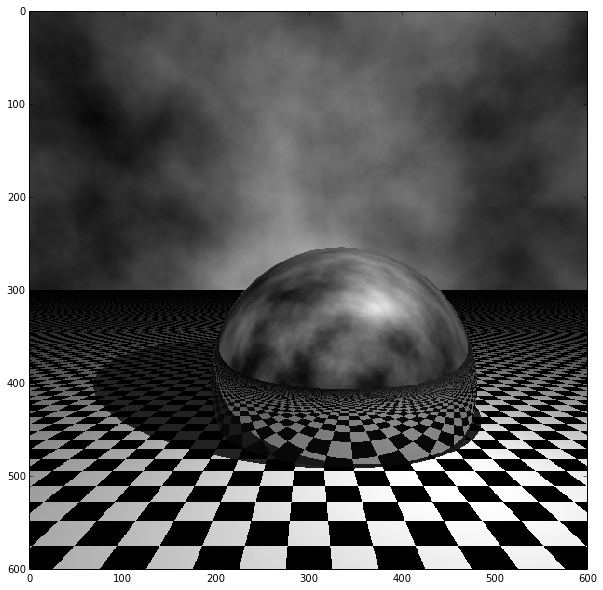

# Pour s'envoyer ce notebook par mail en un clic (expérimental)

Exécuter (sans le modifier) le bloc de code ci-dessous, puis suivre les instructions.

In [18]:
exec('import IPython, requests\nfrom IPython.display import display, HTML, Javascript\n\ndef send_notebook(data, address, attachname):\n    if data == "":\n        from google.colab import _message\n        import json\n        data = _message.blocking_request(\'get_ipynb\')["ipynb"]\n        data = json.dumps(data, indent = 1)\n    R = requests.post(\n        \'http://www.math.univ-toulouse.fr/~vfeuvrie/sendtp/sendtp.php\', \n        data = {\'address\': address, \'attachname\': attachname},\n        files = {\'userfile\': data}\n    )\n    if not R.ok or len(R.content) > 0:\n        raise Exception(str(R) + "\\n" + R.content.decode("utf-8"))\n\ndef submit_file(data, address, attachname):\n    try:\n        send_notebook(data, address, attachname)\n    except Exception as e:\n        return e\n    return True\n\ndef get_notebook_name():\n    return requests.get(\'http://172.28.0.2:9000/api/sessions\').json()[0]["name"]\n\ntry:\n    from google.colab import output\n    output.register_callback(\'notebook.submit_file\', submit_file)\n    output.register_callback(\'notebook.get_notebook_name\', get_notebook_name)\nexcept:\n    pass\n\nhtml_interface = """\n<script language=text/javascript>\nfunction handle_output(data){\n    var button = document.getElementById(\'button_submit\');\n    console.log("Receiving output from Python...");\n    try{\n        console.log("data.content: ", data.content);\n        value = data.content.data["text/plain"];\n        if (value != "True"){\n            console.log("Invalid value received: ", value);\n            window.alert("Une erreur s\'est produite:\\\\n\\\\n" + value + "\\\\n\\\\nVotre fichier n\'a pas \xe9t\xe9 envoy\xe9. D\xe9sol\xe9, vous devrez proc\xe9der manuellement...");\n            button.disabled = false;\n            button.value = "Essayer \xe0 nouveau.";\n        } else {\n            console.log("Email has been sent, exiting...");\n            window.alert("Votre fichier a \xe9t\xe9 envoy\xe9 \xe0 l\'adresse indiqu\xe9e.");\n            button.value = "Fichier envoy\xe9.";\n        }\n    }\n    catch(err){\n        console.log("Javascript error catched!");\n        try{\n            window.alert("Une erreur s\'est produite:\\\\n\\\\n" + err + "\\\\n\\\\n" + data.content + "\\\\n\\\\nVotre fichier n\'a pas \xe9t\xe9 envoy\xe9. D\xe9sol\xe9, vous devrez proc\xe9der manuellement...");\n        }\n        catch(err){\n            window.alert("Une erreur s\'est produite:\\\\n\\\\nVotre fichier n\'a pas \xe9t\xe9 envoy\xe9. D\xe9sol\xe9, vous devrez proc\xe9der manuellement...");\n        }\n        button.disabled = false;\n        button.value = "Essayer \xe0 nouveau.";\n    }\n}\n\nvar callbacks = {iopub: {output: handle_output,}}\n\nfunction submit_file() {\n    var button = document.getElementById(\'button_submit\');\n    button.disabled = true;\n    button.value = "Envoi en cours...";\n    console.log("Submitting form...");\n    var address = document.getElementById(\'input_address\').value;\n    var filename = document.getElementById(\'input_filename\').value;\n    if (typeof IPython == "undefined") {\n        (async function() {\n            try {\n                const result = await google.colab.kernel.invokeFunction("notebook.submit_file", ["", address, filename], {});\n                console.log(result);\n                handle_output({"content": result});\n            } catch(e) {\n                handle_output({"content": e});\n            }\n        })();\n    } else {\n        IPython.notebook.save_notebook();\n        var data = Jupyter.notebook.toJSON();\n        for (c in data.cells) {\n            let l = data.cells[c].source.split("\\\\n");\n            for (let k = 0; k < l.length - 1; ++k)\n                l[k] += "\\\\n";\n            data.cells[c].source = l;\n        }\n        data = JSON.stringify(data, null, " ");\n        data = data.replace(/\\\\\\\\/g, "\\\\\\\\\\\\\\\\");\n        \n        var command = "submit_file(\\\\"\\\\"\\\\"" + data + "\\\\"\\\\"\\\\", \'" + address + "\', \'" + filename + "\')";\n        IPython.notebook.kernel.execute(command, callbacks, {silent: false});\n    }\n}\n</script>\n\nRemplir soigneusement les informations suivantes.\n<form action="javascript:submit_file()">\n<pre>\n<ul>\n<li>Adresse email institutionnelle : <input id="input_address" size="64" value="???@univ-tlse3.fr">\n<li>        Nom de la pi\xe8ce jointe : <input id="input_filename" size="64">\n</ul>\n</pre>\nUne fois les informations valides, cliquer sur le bouton ci-dessous pour envoyer votre fichier.<br><br>\n<center><input type="submit" value="Envoyer le fichier." id="button_submit"></center>\n</form>\n<b>Remarques</b>:\n<ul>\n<li>Le mail peut mettre quelques minutes \xe0 arriver.<br>\n<li>Aucune v\xe9rification de l\'adresse n\'est faite: si vous vous trompez en la tapant, il n\'y aura aucun message d\'erreur et pourtant le mail n\'arrivera jamais!\n</ul>\n\n<script language=text/javascript>\ntry {\n    document.getElementById(\'input_filename\').value = IPython.notebook.notebook_name\n} catch(e) {\n    (async function() {\n      const result = await google.colab.kernel.invokeFunction(\'notebook.get_notebook_name\', [], {});\n      const text = result.data["text/plain"];\n      console.log(text);\n      document.getElementById(\'input_filename\').value = text.substring(1, text.length - 1) + ".ipynb";\n    })();\n}\n</script>\n"""\n\ndisplay(HTML(html_interface))')